In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from scipy.stats import pearsonr, spearmanr

In [3]:
pitch = pd.read_csv('pitch_arsenals.csv')

In [4]:
speed = pd.read_csv('pitch_speed.csv')

In [5]:
pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   last_name    498 non-null    object 
 1    first_name  498 non-null    object 
 2   pitcher      498 non-null    int64  
 3   ff_avg_spin  466 non-null    float64
 4   si_avg_spin  321 non-null    float64
 5   fc_avg_spin  151 non-null    float64
 6   sl_avg_spin  416 non-null    float64
 7   ch_avg_spin  381 non-null    float64
 8   cu_avg_spin  300 non-null    float64
 9   fs_avg_spin  39 non-null     float64
 10  kn_avg_spin  0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 42.9+ KB


In [6]:
pitch.rename(columns={'last_name':'last', ' first_name':'first'}, inplace=True)

In [7]:
pitch['first'] = pitch['first'].astype(str)

In [8]:
pitch['last'] = pitch['last'].astype(str)

In [9]:
pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   last         498 non-null    object 
 1   first        498 non-null    object 
 2   pitcher      498 non-null    int64  
 3   ff_avg_spin  466 non-null    float64
 4   si_avg_spin  321 non-null    float64
 5   fc_avg_spin  151 non-null    float64
 6   sl_avg_spin  416 non-null    float64
 7   ch_avg_spin  381 non-null    float64
 8   cu_avg_spin  300 non-null    float64
 9   fs_avg_spin  39 non-null     float64
 10  kn_avg_spin  0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 42.9+ KB


In [10]:
pitch

,last,first,pitcher,ff_avg_spin,si_avg_spin,fc_avg_spin,sl_avg_spin,ch_avg_spin,cu_avg_spin,fs_avg_spin,kn_avg_spin
0,Alcantara,Sandy,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,NaN
1,Nola,Aaron,605400,2280.0,2174.0,2165.0,NaN,1465.0,2577.0,NaN,NaN
2,Mikolas,Miles,571945,2301.0,2239.0,NaN,2409.0,1575.0,2569.0,NaN,NaN
3,Cease,Dylan,656302,2504.0,2492.0,NaN,2845.0,1707.0,2704.0,NaN,NaN
4,Gilbert,Logan,669302,2132.0,NaN,NaN,2305.0,1717.0,2121.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
493,Mills,Wyatt,670090,1988.0,1810.0,NaN,2384.0,NaN,NaN,NaN,NaN
494,Bruihl,Justin,677865,NaN,2156.0,2291.0,2388.0,NaN,NaN,NaN,NaN
495,Weems,Jordan,607179,2095.0,NaN,NaN,2246.0,908.0,2107.0,NaN,NaN
496,Moronta,Reyes,606625,2312.0,NaN,NaN,2460.0,1947.0,NaN,NaN,NaN


In [11]:
p_stats = pd.read_csv('pitch-arsenal-stats.csv')

In [12]:
pitch['player_name'] = pitch[['first','last']].agg(' '.join, axis=1)

In [13]:
pitch

,last,first,pitcher,ff_avg_spin,si_avg_spin,fc_avg_spin,sl_avg_spin,ch_avg_spin,cu_avg_spin,fs_avg_spin,kn_avg_spin,player_name
0,Alcantara,Sandy,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,NaN,Sandy Alcantara
1,Nola,Aaron,605400,2280.0,2174.0,2165.0,NaN,1465.0,2577.0,NaN,NaN,Aaron Nola
2,Mikolas,Miles,571945,2301.0,2239.0,NaN,2409.0,1575.0,2569.0,NaN,NaN,Miles Mikolas
3,Cease,Dylan,656302,2504.0,2492.0,NaN,2845.0,1707.0,2704.0,NaN,NaN,Dylan Cease
4,Gilbert,Logan,669302,2132.0,NaN,NaN,2305.0,1717.0,2121.0,NaN,NaN,Logan Gilbert
...,...,...,...,...,...,...,...,...,...,...,...,...
493,Mills,Wyatt,670090,1988.0,1810.0,NaN,2384.0,NaN,NaN,NaN,NaN,Wyatt Mills
494,Bruihl,Justin,677865,NaN,2156.0,2291.0,2388.0,NaN,NaN,NaN,NaN,Justin Bruihl
495,Weems,Jordan,607179,2095.0,NaN,NaN,2246.0,908.0,2107.0,NaN,NaN,Jordan Weems
496,Moronta,Reyes,606625,2312.0,NaN,NaN,2460.0,1947.0,NaN,NaN,NaN,Reyes Moronta


In [14]:
p_stats

,last_name,first_name,player_id,team_name_alt,pitch_type,pitch_name,run_value_per_100,run_value,pitches,pitch_usage,...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,Rodón,Carlos,607074,SF,FF,4-Seamer,-1.5,-16,1077,62.1,...,0.222,0.339,0.288,25.3,28.1,23.7,0.244,0.401,0.310,44.0
1,Gilbert,Logan,669302,SEA,FF,4-Seamer,-0.5,-6,1023,55.7,...,0.253,0.451,0.343,23.6,22.6,20.3,0.289,0.525,0.377,51.1
2,Manaea,Sean,640455,SD,SIFT,Sinker,-0.2,-1,983,62.5,...,0.222,0.369,0.308,24.4,23.3,20.8,0.248,0.427,0.333,43.1
3,Burnes,Corbin,669203,MIL,FC,Cutter,-2.1,-22,1032,56.7,...,0.187,0.271,0.261,31.7,26.0,25.3,0.246,0.373,0.307,38.5
4,McKenzie,Triston,663474,CLE,FF,4-Seamer,-0.8,-7,884,58.9,...,0.204,0.393,0.316,17.3,15.0,15.0,0.277,0.563,0.393,49.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Houser,Adrian,605288,MIL,FF,4-Seamer,1.3,3,225,16.6,...,0.255,0.426,0.334,20.6,38.0,20.0,0.206,0.378,0.272,35.7
711,De Jong,Chase,608328,PIT,SL,Slider,-2.6,-5,176,30.3,...,0.188,0.292,0.226,43.3,40.0,30.3,0.153,0.290,0.205,32.1
712,Rodríguez,Joely,570257,NYM,CH,Changeup,-0.7,-1,174,37.0,...,0.140,0.233,0.253,38.6,28.0,19.7,0.232,0.353,0.312,37.9
713,Adam,Jason,592094,TB,CH,Changeup,-2.5,-4,181,32.3,...,0.130,0.261,0.207,34.4,30.0,22.7,0.177,0.225,0.217,25.8


In [15]:
p_stats['player_name'] = p_stats[[' first_name', 'last_name']].agg(' '.join, axis=1)

In [16]:
speed['player_name'] = speed[[' first_name','last_name']].agg(' '.join, axis=1)

In [17]:
speed

,last_name,first_name,pitcher,ff_avg_speed,si_avg_speed,fc_avg_speed,sl_avg_speed,ch_avg_speed,cu_avg_speed,fs_avg_speed,kn_avg_speed,player_name
0,Alcantara,Sandy,645261,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN,Sandy Alcantara
1,Mikolas,Miles,571945,93.4,92.8,NaN,87.8,82.5,75.9,NaN,NaN,Miles Mikolas
2,Nola,Aaron,605400,92.8,92.1,86.8,NaN,85.9,78.5,NaN,NaN,Aaron Nola
3,Cease,Dylan,656302,96.8,96.5,NaN,87.1,77.7,80.9,NaN,NaN,Dylan Cease
4,Cole,Gerrit,543037,97.8,NaN,92.1,88.4,89.9,82.7,NaN,NaN,Gerrit Cole
...,...,...,...,...,...,...,...,...,...,...,...,...
502,Bruihl,Justin,677865,NaN,88.5,86.2,76.9,NaN,NaN,NaN,NaN,Justin Bruihl
503,Castro,Anthony,621593,94.8,95.5,NaN,84.4,87.3,NaN,NaN,NaN,Anthony Castro
504,Beasley,Jeremy,676886,95.4,NaN,NaN,82.2,NaN,78.7,87.4,NaN,Jeremy Beasley
505,Bird,Jake,656234,95.5,95.2,91.1,NaN,86.8,81.8,NaN,NaN,Jake Bird


In [18]:
speed.rename(columns={'ff_avg_speed':'Fastballavg_spd','si_avg_speed':'sinkeravg_spd','fc_avg_speed':'Cutteravg_spd',
                     'sl_avg_speed':'Slideravg_speed', 'ch_avg_speed':'Changeupavg_speed', 'cu_avg_speed':'Curveavg_speed',
                     'fs_avg_speed':'Splitteravg_speed','kn_avg_speed':'Knuckleavg_speed'},inplace=True)

In [19]:
stats = pd.DataFrame(data=(pitch.merge(p_stats, how='outer')))

In [20]:
stats.rename(columns={'ff_avg_spin':'4smFastball_spin', 'si_avg_spin':'Sinkeravg_spin',
                     'fc_avg_spin':'Cutteravg_spin','sl_avg_spin':'Slideravg_spin',
                      'ch_avg_spin':'Changeupavg_spin','cu_avg_spin':'Curveavg_spin',
                      'fs_avg_spin':'Splitteravg_spin','kn_avg_spin':'knuckleballavg_spin'},inplace=True)

In [21]:
allstats = pd.DataFrame(data=(stats.merge(speed, how='outer')))

In [22]:
allstats

,last,first,pitcher,4smFastball_spin,Sinkeravg_spin,Cutteravg_spin,Slideravg_spin,Changeupavg_spin,Curveavg_spin,Splitteravg_spin,...,est_woba,hard_hit_percent,Fastballavg_spd,sinkeravg_spd,Cutteravg_spd,Slideravg_speed,Changeupavg_speed,Curveavg_speed,Splitteravg_speed,Knuckleavg_speed
0,Alcantara,Sandy,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,...,0.201,25.8,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
1,Alcantara,Sandy,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,...,0.300,39.1,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
2,Alcantara,Sandy,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,...,0.305,40.2,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
3,Alcantara,Sandy,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,...,0.270,47.6,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
4,Nola,Aaron,605400,2280.0,2174.0,2165.0,NaN,1465.0,2577.0,NaN,...,0.238,31.9,92.8,92.1,86.8,NaN,85.9,78.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,NaN,NaN,677865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,88.5,86.2,76.9,NaN,NaN,NaN,NaN
958,NaN,NaN,621593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,94.8,95.5,NaN,84.4,87.3,NaN,NaN,NaN
959,NaN,NaN,676886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.4,NaN,NaN,82.2,NaN,78.7,87.4,NaN
960,NaN,NaN,656234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.5,95.2,91.1,NaN,86.8,81.8,NaN,NaN


In [23]:
allstats['player_name'].isnull().all()

False

In [24]:
allstats.drop(columns=['last','first',' first_name','last_name','player_id'],axis=1, inplace=True)

In [25]:
allstats

,pitcher,4smFastball_spin,Sinkeravg_spin,Cutteravg_spin,Slideravg_spin,Changeupavg_spin,Curveavg_spin,Splitteravg_spin,knuckleballavg_spin,player_name,...,est_woba,hard_hit_percent,Fastballavg_spd,sinkeravg_spd,Cutteravg_spd,Slideravg_speed,Changeupavg_speed,Curveavg_speed,Splitteravg_speed,Knuckleavg_speed
0,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,NaN,Sandy Alcantara,...,0.201,25.8,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
1,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,NaN,Sandy Alcantara,...,0.300,39.1,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
2,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,NaN,Sandy Alcantara,...,0.305,40.2,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
3,645261,2174.0,2272.0,NaN,2334.0,2038.0,2333.0,NaN,NaN,Sandy Alcantara,...,0.270,47.6,97.9,97.6,NaN,89.6,91.8,86.0,NaN,NaN
4,605400,2280.0,2174.0,2165.0,NaN,1465.0,2577.0,NaN,NaN,Aaron Nola,...,0.238,31.9,92.8,92.1,86.8,NaN,85.9,78.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,677865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin Bruihl,...,NaN,NaN,NaN,88.5,86.2,76.9,NaN,NaN,NaN,NaN
958,621593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anthony Castro,...,NaN,NaN,94.8,95.5,NaN,84.4,87.3,NaN,NaN,NaN
959,676886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jeremy Beasley,...,NaN,NaN,95.4,NaN,NaN,82.2,NaN,78.7,87.4,NaN
960,656234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jake Bird,...,NaN,NaN,95.5,95.2,91.1,NaN,86.8,81.8,NaN,NaN


In [26]:
allstats.groupby('player_name').max()

,pitcher,4smFastball_spin,Sinkeravg_spin,Cutteravg_spin,Slideravg_spin,Changeupavg_spin,Curveavg_spin,Splitteravg_spin,knuckleballavg_spin,team_name_alt,...,est_woba,hard_hit_percent,Fastballavg_spd,sinkeravg_spd,Cutteravg_spd,Slideravg_speed,Changeupavg_speed,Curveavg_speed,Splitteravg_speed,Knuckleavg_speed
player_name,,,,,,,,,,,,,,,,,,,,,
A.J. Minter,621345,2417.0,NaN,2625.0,NaN,1678.0,NaN,NaN,NaN,ATL,...,0.256,42.5,96.6,NaN,90.5,NaN,87.6,NaN,NaN,NaN
A.J. Puk,640462,2255.0,2160.0,NaN,2235.0,1362.0,NaN,NaN,NaN,OAK,...,0.310,42.9,96.6,96.1,NaN,86.6,89.0,NaN,NaN,NaN
Aaron Ashby,676879,2103.0,2075.0,NaN,2550.0,1840.0,2584.0,NaN,NaN,MIL,...,0.371,45.7,95.6,96.0,NaN,83.4,89.2,79.7,NaN,NaN
Aaron Bummer,607481,NaN,2101.0,2390.0,2477.0,1463.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,94.2,86.0,82.0,89.3,NaN,NaN,NaN
Aaron Civale,650644,2344.0,2325.0,2605.0,2837.0,NaN,2935.0,1829.0,NaN,CLE,...,0.451,48.9,90.5,91.0,86.2,80.2,NaN,75.6,85.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Thompson,605507,2373.0,2214.0,2588.0,NaN,1864.0,2255.0,NaN,NaN,PIT,...,0.385,41.8,92.3,92.2,86.5,NaN,85.9,77.4,NaN,NaN
Zack Greinke,425844,2296.0,2184.0,2392.0,2435.0,1605.0,2411.0,NaN,NaN,KC,...,0.469,48.5,89.1,89.5,86.2,82.2,86.7,71.8,NaN,NaN
Zack Littell,641793,2134.0,NaN,NaN,2214.0,NaN,NaN,998.0,NaN,SF,...,0.352,40.5,94.3,NaN,NaN,87.5,NaN,NaN,85.6,NaN


In [27]:
stats.rename(columns={'ff_avg_spin':'4smFastball_spin', 'si_avg_spin':'Sinkeravg_spin',
                     'fc_avg_spin':'Cutteravg_spin','sl_avg_spin':'Slideravg_spin',
                      'ch_avg_spin':'Changeupavg_spin','cu_avg_spin':'Curveavg_spin',
                      'fs_avg_spin':'Splitteravg_spin','kn_avg_spin':'knuckleballavg_spin'},inplace=True)

In [28]:
allstats.tail()

,pitcher,4smFastball_spin,Sinkeravg_spin,Cutteravg_spin,Slideravg_spin,Changeupavg_spin,Curveavg_spin,Splitteravg_spin,knuckleballavg_spin,player_name,...,est_woba,hard_hit_percent,Fastballavg_spd,sinkeravg_spd,Cutteravg_spd,Slideravg_speed,Changeupavg_speed,Curveavg_speed,Splitteravg_speed,Knuckleavg_speed
957,677865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Justin Bruihl,...,NaN,NaN,NaN,88.5,86.2,76.9,NaN,NaN,NaN,NaN
958,621593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anthony Castro,...,NaN,NaN,94.8,95.5,NaN,84.4,87.3,NaN,NaN,NaN
959,676886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jeremy Beasley,...,NaN,NaN,95.4,NaN,NaN,82.2,NaN,78.7,87.4,NaN
960,656234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jake Bird,...,NaN,NaN,95.5,95.2,91.1,NaN,86.8,81.8,NaN,NaN
961,596271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casey Lawrence,...,NaN,NaN,91.1,90.1,NaN,81.5,83.2,75.8,NaN,NaN


In [29]:
fastball = allstats.groupby('player_name')[['4smFastball_spin','Fastballavg_spd','ba','slg','k_percent','whiff_percent']].max()

In [30]:
fastball.isnull().any()

4smFastball_spin    True
Fastballavg_spd     True
ba                  True
slg                 True
k_percent           True
whiff_percent       True
dtype: bool

In [31]:
fastball.dropna(inplace=True)

In [32]:
fastball.isnull().any()

4smFastball_spin    False
Fastballavg_spd     False
ba                  False
slg                 False
k_percent           False
whiff_percent       False
dtype: bool

In [33]:
fastball

,4smFastball_spin,Fastballavg_spd,ba,slg,k_percent,whiff_percent
player_name,,,,,,
A.J. Minter,2417.0,96.6,0.147,0.221,39.0,31.2
A.J. Puk,2255.0,96.6,0.228,0.421,35.6,36.4
Aaron Ashby,2103.0,95.6,0.286,0.471,44.4,39.9
Aaron Civale,2344.0,90.5,0.333,0.549,43.9,41.5
Aaron Nola,2280.0,92.8,0.357,0.500,36.3,37.8
...,...,...,...,...,...,...
Zach Plesac,2134.0,92.0,0.317,0.508,35.6,38.7
Zach Thompson,2373.0,92.3,0.296,0.518,20.2,25.0
Zack Greinke,2296.0,89.1,0.339,0.571,14.6,22.8


In [34]:
spearmanr(fastball['4smFastball_spin'],fastball['ba'])

SpearmanrResult(correlation=-0.21071184086570663, pvalue=6.614064981636158e-05)

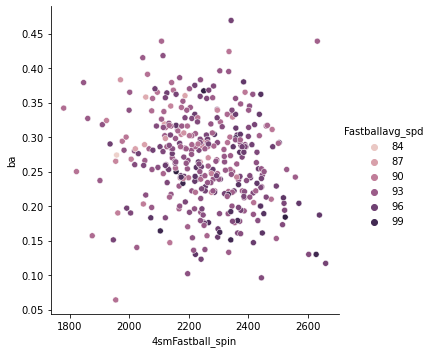

In [35]:
sns.relplot(data=fastball, x='4smFastball_spin', y='ba',hue='Fastballavg_spd')


In [36]:
spearmanr(fastball['Fastballavg_spd'],fastball['ba'])

SpearmanrResult(correlation=-0.2327770842957492, pvalue=9.924137417668787e-06)

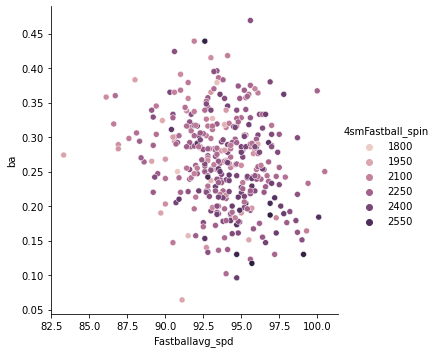

In [37]:
sns.relplot(data=fastball, x='Fastballavg_spd', y='ba',hue='4smFastball_spin')

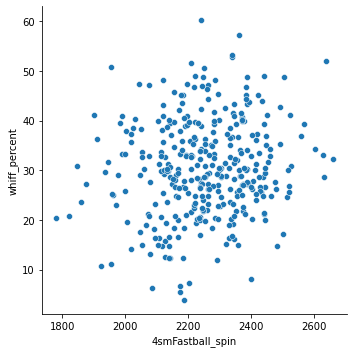

In [38]:
sns.relplot(data=fastball, x='4smFastball_spin', y='whiff_percent')

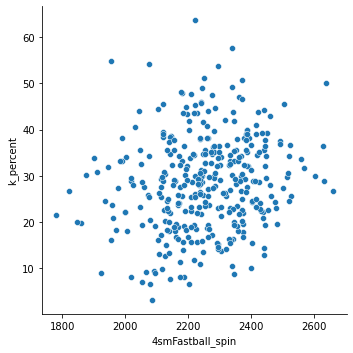

In [39]:
sns.relplot(data=fastball, x='4smFastball_spin', y='k_percent')

In [40]:
sinker = allstats.groupby('player_name')[['Sinkeravg_spin','sinkeravg_spd','ba','slg','k_percent','whiff_percent']].max()

In [41]:
sinker.dropna(inplace=True)

In [42]:
sinker

,Sinkeravg_spin,sinkeravg_spd,ba,slg,k_percent,whiff_percent
player_name,,,,,,
A.J. Puk,2160.0,96.1,0.228,0.421,35.6,36.4
Aaron Ashby,2075.0,96.0,0.286,0.471,44.4,39.9
Aaron Civale,2325.0,91.0,0.333,0.549,43.9,41.5
Aaron Loup,2126.0,91.5,0.290,0.449,21.3,11.0
Aaron Nola,2174.0,92.1,0.357,0.500,36.3,37.8
...,...,...,...,...,...,...
Zach Eflin,2037.0,92.6,0.316,0.509,48.1,45.1
Zach Plesac,2080.0,89.4,0.317,0.508,35.6,38.7
Zach Thompson,2214.0,92.2,0.296,0.518,20.2,25.0


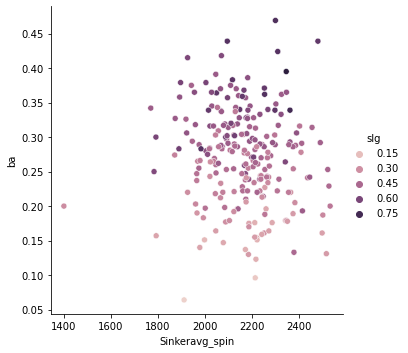

In [43]:
sns.relplot(data=sinker, x='Sinkeravg_spin', y= 'ba', hue='slg')

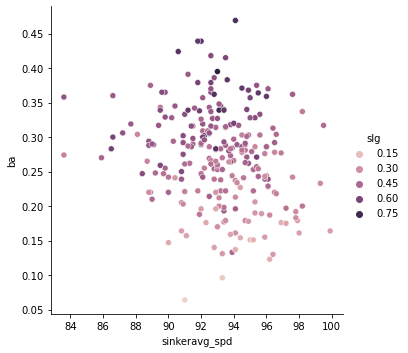

In [44]:
sns.relplot(data=sinker, x='sinkeravg_spd', y= 'ba', hue='slg')

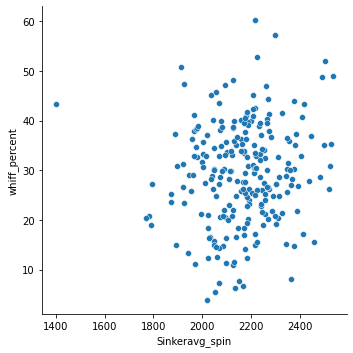

In [45]:
sns.relplot(data=sinker, x='Sinkeravg_spin', y='whiff_percent')

In [46]:
cutter = allstats.groupby('player_name')[['Cutteravg_spin','Cutteravg_spd','ba','slg','k_percent','whiff_percent']].max()

In [47]:
cutter.dropna(inplace=True)

In [48]:
cutter

,Cutteravg_spin,Cutteravg_spd,ba,slg,k_percent,whiff_percent
player_name,,,,,,
A.J. Minter,2625.0,90.5,0.147,0.221,39.0,31.2
Aaron Civale,2605.0,86.2,0.333,0.549,43.9,41.5
Aaron Loup,2311.0,85.1,0.290,0.449,21.3,11.0
Aaron Nola,2165.0,86.8,0.357,0.500,36.3,37.8
Adam Ottavino,2584.0,87.9,0.161,0.290,29.0,34.1
...,...,...,...,...,...,...
Zach Eflin,2142.0,89.9,0.316,0.509,48.1,45.1
Zach Jackson,2204.0,94.2,0.183,0.222,39.1,43.1
Zach Logue,2237.0,85.7,0.268,0.554,18.2,19.5


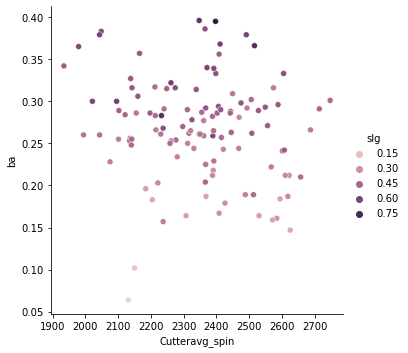

In [49]:
sns.relplot(data=cutter, x='Cutteravg_spin', y='ba', hue='slg')

In [54]:
allstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 961
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pitcher              962 non-null    int64  
 1   4smFastball_spin     794 non-null    float64
 2   Sinkeravg_spin       562 non-null    float64
 3   Cutteravg_spin       277 non-null    float64
 4   Slideravg_spin       698 non-null    float64
 5   Changeupavg_spin     673 non-null    float64
 6   Curveavg_spin        558 non-null    float64
 7   Splitteravg_spin     61 non-null     float64
 8   knuckleballavg_spin  0 non-null      float64
 9   player_name          962 non-null    object 
 10  team_name_alt        715 non-null    object 
 11  pitch_type           715 non-null    object 
 12  pitch_name           715 non-null    object 
 13  run_value_per_100    715 non-null    float64
 14  run_value            715 non-null    float64
 15  pitches              715 non-null    flo

In [61]:
allstats.groupby(['player_name','4smFastball_spin']).max()

,,pitcher,Sinkeravg_spin,Cutteravg_spin,Slideravg_spin,Changeupavg_spin,Curveavg_spin,Splitteravg_spin,knuckleballavg_spin,team_name_alt,pitch_type,...,est_woba,hard_hit_percent,Fastballavg_spd,sinkeravg_spd,Cutteravg_spd,Slideravg_speed,Changeupavg_speed,Curveavg_speed,Splitteravg_speed,Knuckleavg_speed
player_name,4smFastball_spin,,,,,,,,,,,,,,,,,,,,,
A.J. Minter,2417.0,621345,NaN,2625.0,NaN,1678.0,NaN,NaN,NaN,ATL,FF,...,0.256,42.5,96.6,NaN,90.5,NaN,87.6,NaN,NaN,NaN
A.J. Puk,2255.0,640462,2160.0,NaN,2235.0,1362.0,NaN,NaN,NaN,OAK,SL,...,0.310,42.9,96.6,96.1,NaN,86.6,89.0,NaN,NaN,NaN
Aaron Ashby,2103.0,676879,2075.0,NaN,2550.0,1840.0,2584.0,NaN,NaN,MIL,SL,...,0.371,45.7,95.6,96.0,NaN,83.4,89.2,79.7,NaN,NaN
Aaron Civale,2344.0,650644,2325.0,2605.0,2837.0,NaN,2935.0,1829.0,NaN,CLE,SIFT,...,0.451,48.9,90.5,91.0,86.2,80.2,NaN,75.6,85.4,NaN
Aaron Nola,2280.0,605400,2174.0,2165.0,NaN,1465.0,2577.0,NaN,NaN,PHI,SIFT,...,0.334,37.3,92.8,92.1,86.8,NaN,85.9,78.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Thompson,2373.0,605507,2214.0,2588.0,NaN,1864.0,2255.0,NaN,NaN,PIT,SIFT,...,0.385,41.8,92.3,92.2,86.5,NaN,85.9,77.4,NaN,NaN
Zack Greinke,2296.0,425844,2184.0,2392.0,2435.0,1605.0,2411.0,NaN,NaN,KC,SL,...,0.469,48.5,89.1,89.5,86.2,82.2,86.7,71.8,NaN,NaN
Zack Littell,2134.0,641793,NaN,NaN,2214.0,NaN,NaN,998.0,NaN,SF,SL,...,0.352,40.5,94.3,NaN,NaN,87.5,NaN,NaN,85.6,NaN


In [67]:
allstats.query('player_name == " Aaron Ashby"')[['ba', 'slg']]

,ba,slg
290,0.232,0.316
291,0.280,0.439
292,0.286,0.471
